In [116]:
# Importer les packages nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [117]:
# Importer les packages machine learning
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report    

In [118]:
# Importer la base de données
from sklearn.datasets import load_iris
iris = load_iris()

In [119]:
# Création du dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [120]:
# Affichage du dataframe
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [121]:
df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

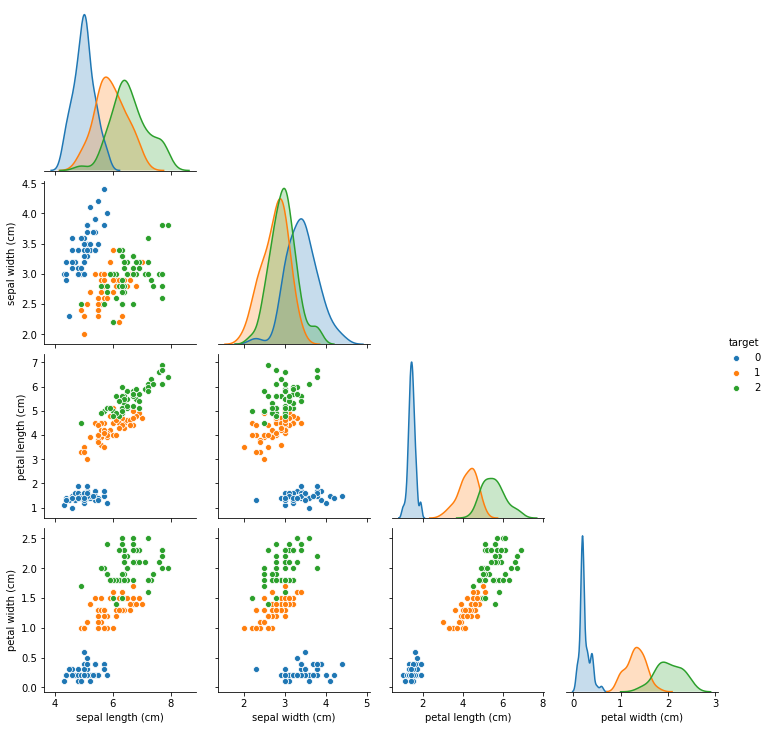

In [122]:
# Vision générale sur dataframe
sns.pairplot(df, corner = True, hue ='target', vars=iris['feature_names'])

In [123]:
# Séparation du jeu de données entre les datas et les targets
X = df.iloc[:, 0:4]
y = df.iloc[:,-1]

In [134]:
# Création du model
model = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

In [135]:
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [136]:
# Appliquer le modèle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [137]:
# Vérifier la précision méthode 1
print('precision', metrics.accuracy_score(y_test, y_pred))

precision 1.0


In [138]:
# Vérifier la précision méthod 2
print(model.score(X_test, y_test))

1.0


In [139]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



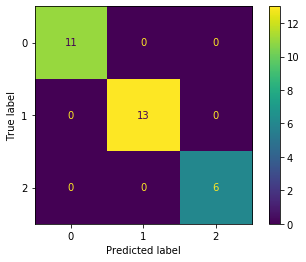

In [140]:
# Matrice de correlation
plot_confusion_matrix(model, X_test, y_test)
plt.show()

[Text(697.5, 498.3, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(590.1923076923077, 407.70000000000005, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(804.8076923076923, 407.70000000000005, 'petal width (cm) <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(429.2307692307692, 317.1, 'petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(214.6153846153846, 226.5, 'petal width (cm) <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(107.3076923076923, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(321.9230769230769, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(643.8461538461538, 226.5, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(536.538461538461

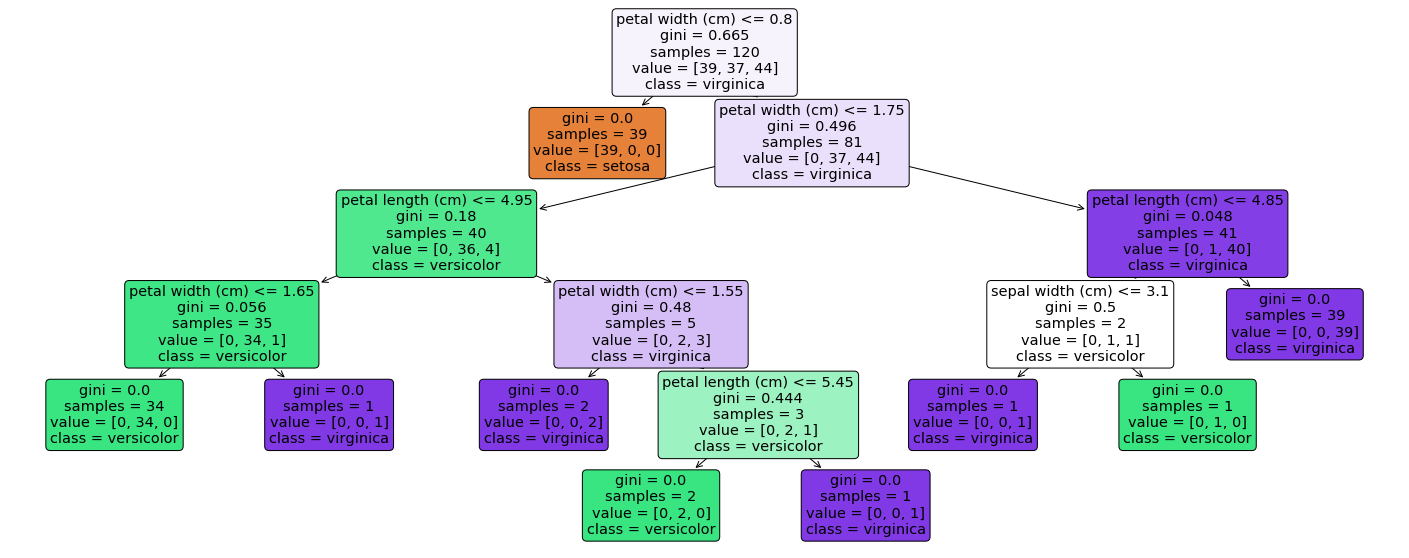

In [143]:
# Afficher l'arbre de décision
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded = True )